In [1]:
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("data/autos.csv", encoding='ISO-8859-1',chunksize=1000)

In [3]:
firstDataChunk = dataset.get_chunk()

In [4]:
firstDataChunk.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
# Utility Functions

def getDataBatch(fileName):
    dataset=pd.read_csv(fileName, encoding='ISO-8859-1',chunksize=1000,iterator=True)
    for dataBatch in dataset:
        yield(dataBatch)

def getUniqueValueforFeature(fileName, featureName):
    columnValueCounts = Counter()
    for dataBatch in getDataBatch(fileName):
        columnValueCounts = Counter(dataBatch[featureName].value_counts(dropna=False).to_dict()) + columnValueCounts
    return columnValueCounts

def basicDataAnalysis(batchDataset,featureName):
    uniqueValues = len(batchDataset[featureName].unique())
    print(f"Number of Unique Values for feature {featureName} in Batch Dataset : {uniqueValues}")
    print(f"Number of NAN values for feature {featureName} in Batch Dataset: {batchDataset[batchDataset[featureName].isna()].shape[0]}")
    uniqueValueCounts = {}
    if(uniqueValues<200):
        uniqueValueCounts = getUniqueValueforFeature("data/autos.csv",featureName)
    return uniqueValueCounts

<h2 align="center"> Analysing each feature</h2>

<h3>Unnecessary features based on description on Kaggle = ['dateCrawled','dateCreated','lastSeen'] </h3>

<h3> Analyzing Feature 1: "fuelType"</h3>

In [6]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"fuelType")

Number of Unique Values for feature fuelType in Batch Dataset : 5
Number of NAN values for feature fuelType in Batch Dataset: 92


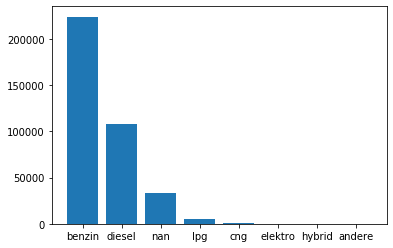

In [7]:
plt.bar(range(len(uniqueValueCounts)), list(uniqueValueCounts.values()), align='center')
ax = plt.xticks(range(len(uniqueValueCounts)), list(uniqueValueCounts.keys()))

<b style="color:green">Conclusion about feature "fuelType"</b> : <i>It seems to be an important feature because of multiple unqiue values and good split between them.</i>

<h3> Analyzing Feature 2: "brand"</h3>

In [8]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"brand")

Number of Unique Values for feature brand in Batch Dataset : 38
Number of NAN values for feature brand in Batch Dataset: 0


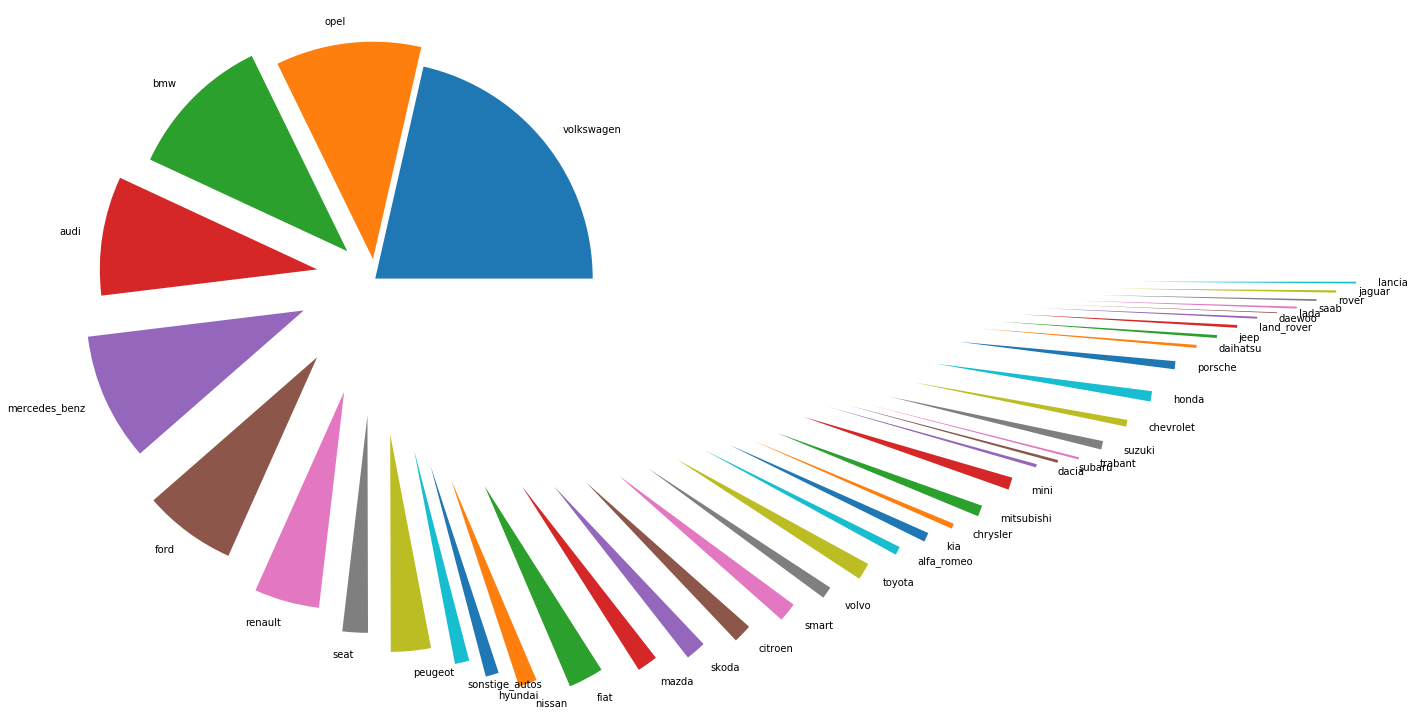

In [9]:
plt.figure(figsize = (20,10))
explode = [i*0.09 for i in range(40)]
ax = plt.pie(list(uniqueValueCounts.values()),labels=list(uniqueValueCounts.keys()),explode=explode)

<b style="color:green">Conclusion about feature "brand"</b> : <i>It seems to be an important feature because of multiple unqiue values and good split between them.</i>

<h3> Analyzing Feature 3 : "name"</h3>

In [10]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"name")

Number of Unique Values for feature name in Batch Dataset : 976
Number of NAN values for feature name in Batch Dataset: 0


<b style="color:red">Conclusion about feature "name"</b> : <i>By Looking at this feature it seems every row have different name. Hence not a important feature and can be dropped</i>

<h3> Analyzing Feature 4 : "abtest"</h3>

Number of Unique Values for feature abtest in Batch Dataset : 2
Number of NAN values for feature abtest in Batch Dataset: 0


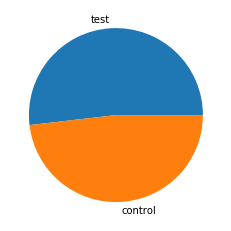

In [11]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"abtest")
ax = plt.pie(uniqueValueCounts.values(),labels=uniqueValueCounts.keys())

<b style="color:green">Conclusion about feature "abtest"</b> : <i>It is a important feature and we see balance between 2 unique values.</i>

<h3> Analyzing Feature 5 : "vehicleType"</h3>

Number of Unique Values for feature vehicleType in Batch Dataset : 9
Number of NAN values for feature vehicleType in Batch Dataset: 118


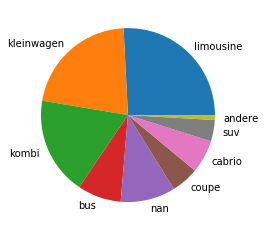

In [12]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"vehicleType")
ax = plt.pie(list(uniqueValueCounts.values()),labels=list(uniqueValueCounts.keys()))

<b style="color:green"> Conclusion about feature "vehicleType"</b> : <i>It is a important feature and we see many different unique values and good balance between them.</i>

<h3> Analyzing Feature 6 : "yearOfRegistration"</h3>

In [52]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"yearOfRegistration")

Number of Unique Values for feature yearOfRegistration in Batch Dataset : 44
Number of NAN values for feature yearOfRegistration in Batch Dataset: 0


In [53]:
# Looking at used cars sold in a century
centuryDict = {}
for key in uniqueValueCounts:
    if int(key/100) in centuryDict:
        centuryDict[int(key/100)] = centuryDict[int(key/100)] + uniqueValueCounts[key]
    else:
        centuryDict[int(key/100)] = uniqueValueCounts[key]

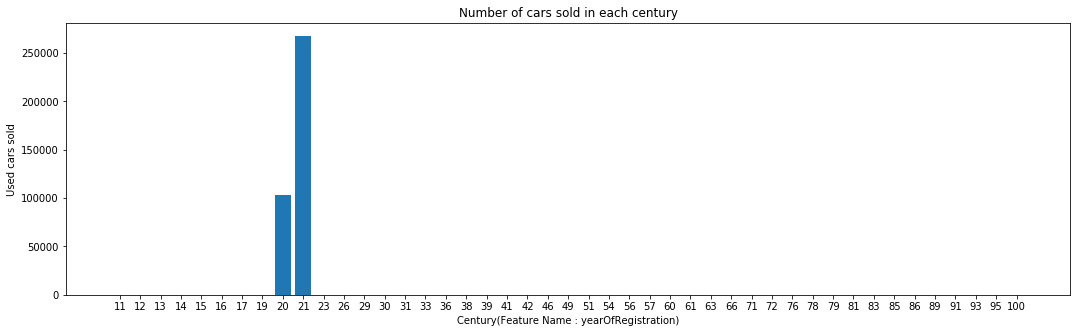

In [54]:
import operator
centuryDict = dict(sorted(centuryDict.items(), key=operator.itemgetter(0)))

fig = plt.figure(figsize=(18, 5))
plt.bar(range(len(centuryDict)), list(centuryDict.values()), align='center')
plt.xlabel("Century(Feature Name : yearOfRegistration)")
plt.ylabel("Used cars sold")
plt.title("Number of cars sold in each century")
ax = plt.xticks(range(len(centuryDict)), [(x+1) for x in centuryDict.keys()])

<b style="color:brown"> Conclusion about feature "yearOfRegistration" </b>: <i>Majority of values are in 20th and 21st century. Some data is from after 21st century which seems errorneous because it is from future year.Some data is from 11th century which also seems errorneous because cars were not invented till then. It seems to be an important feature but needs some cleaning. Hence will be taking data from 1950-2018</i>

<h3> Analyzing Feature 7 : "gearbox"</h3>

In [16]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"gearbox")
print(f"Unique Values and their Count in complete Dataset : {uniqueValueCounts}")

Number of Unique Values for feature gearbox in Batch Dataset : 3
Number of NAN values for feature gearbox in Batch Dataset: 62
Unique Values and their Count in complete Dataset : Counter({'manuell': 274214, 'automatik': 77105, nan: 20209})


<b style="color:green"> Conclusion about feature "gearbox"</b> : <i>It seems to be an important feature because of multiple unique values and good split between them. Since there are many nan values, we might need to create a seperate class for them</i>

<h3> Analyzing Feature 8: "powerPS"</h3>

In [51]:
firstDataChunk["powerPS"].unique()

array([  0, 190, 163,  75,  69, 102, 109,  50, 125, 101, 105, 140, 115,
       131,  60, 136, 160, 231,  90, 118, 193,  99, 113, 218, 122, 129,
        70, 306,  95,  61, 177,  80, 170,  55, 143,  64, 286, 232, 150,
       156,  82, 204, 155,  54, 185,  87, 180,  86,  84, 303, 224, 235,
       200, 178, 265,  77, 110, 144, 120, 116, 184, 126,  88, 194, 305,
       197, 179, 250,  45, 313,  41, 165,  98, 130, 114, 211,  56, 326,
       201, 213,  58, 107,  83, 174, 100, 220,  85,  73, 192,  68,  66,
       299,  74,  52, 510, 147,  65, 310,  71,  97, 239, 295, 203,   5,
       300, 103, 245, 258, 292, 320,  63,  81, 148, 354,  44, 145, 230,
       280, 260, 457, 104, 409, 188, 333, 186, 117, 141,  59, 132, 234,
       158,  39, 272,  92,  51, 135,  53, 435])

In [ ]:
# powerPS value of 0 doesnot make sense. 

<b style="color:brown">Conclusion about feature "powerPS"</b> : <i>Zeros values of powerPS doesnot make sense. Hence should be removed. Other than that it seems to be an important feature because of multiple unique values and good split between them.</i>

<h3> Analyzing Feature 9: "model"</h3>

In [19]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"model")
print(f"Unique Values Count in complete Dataset : {len(uniqueValueCounts)}")

Number of Unique Values for feature model in Batch Dataset : 153
Number of NAN values for feature model in Batch Dataset: 51
Unique Values Count in complete Dataset : 252


<b style="color:green">Conclusion about feature "model"</b> : <i>It seems to be an important feature because of multiple unqiue values and good split between them.</i>

<h3> Analyzing Feature 10: "kilometer"</h3>

In [20]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"kilometer")

Number of Unique Values for feature kilometer in Batch Dataset : 13
Number of NAN values for feature kilometer in Batch Dataset: 0


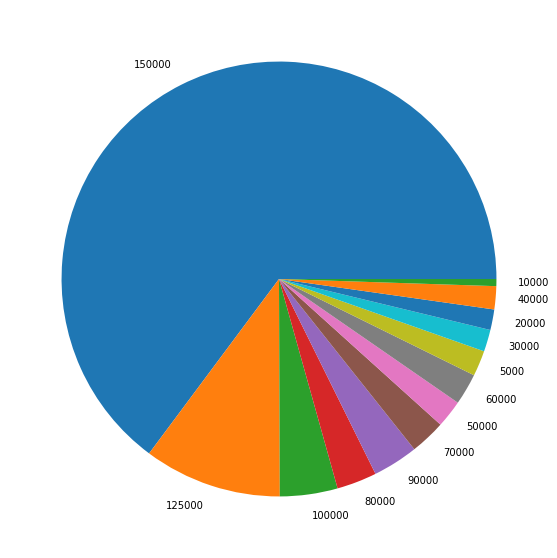

In [21]:
plt.figure(figsize=(10,10))
ax=plt.pie(uniqueValueCounts.values(),labels=uniqueValueCounts.keys())

<b style="color:green">Conclusion about feature "kilometer"</b> : <i>It seems to be an important feature because of multiple unqiue values and good split between them.</i>

<h3> Analyzing Feature 11: "monthOfRegistration"</h3>

In [22]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"monthOfRegistration")

Number of Unique Values for feature monthOfRegistration in Batch Dataset : 13
Number of NAN values for feature monthOfRegistration in Batch Dataset: 0


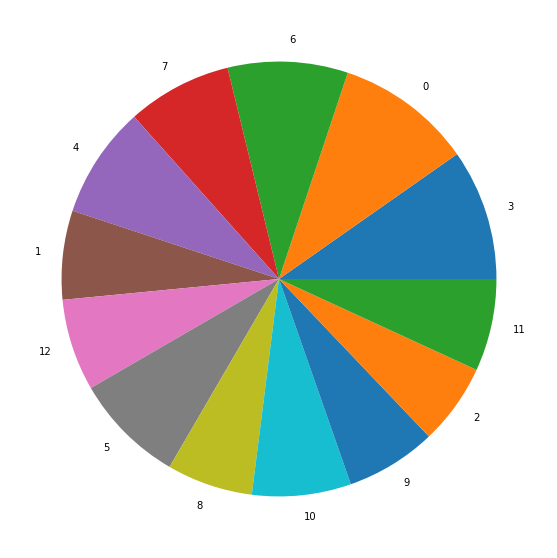

In [23]:
plt.figure(figsize=(10,10))
ax=plt.pie(uniqueValueCounts.values(),labels=uniqueValueCounts.keys())

<b style="color:green">Conclusion about feature "monthOfRegistration"</b> : <i>It seems to be an important feature because of multiple unqiue values and good split between them. Ideally there should be 12 months. Not removing extra month for now</i>

<h3> Analyzing Feature 12 : "seller"</h3>

In [24]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"seller")
print(f"Unique Values and their Count in complete Dataset : {uniqueValueCounts}")

Number of Unique Values for feature seller in Batch Dataset : 1
Number of NAN values for feature seller in Batch Dataset: 0
Unique Values and their Count in complete Dataset : Counter({'privat': 371525, 'gewerblich': 3})


<b style="color:red">Conclusion about feature "seller"</b> : <i>It is also not a important feature because majority of values are "privat".</i>

<h3> Analyzing Feature 13 : "offerType"</h3>

In [25]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"offerType")
print(f"Unique Values and their Count in complete Dataset : {uniqueValueCounts}")

Number of Unique Values for feature offerType in Batch Dataset : 1
Number of NAN values for feature offerType in Batch Dataset: 0
Unique Values and their Count in complete Dataset : Counter({'Angebot': 371516, 'Gesuch': 12})


<b style="color:red">Conclusion about feature "offerType"</b> : <i>It is also not a important feature because majority of values are "AngeBot".</i>

<h3> Analyzing Feature 14: "notRepairedDamage"</h3>

In [26]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"notRepairedDamage")
print(f"Unique Values and their Count in complete Dataset : {uniqueValueCounts}")

Number of Unique Values for feature notRepairedDamage in Batch Dataset : 3
Number of NAN values for feature notRepairedDamage in Batch Dataset: 194
Unique Values and their Count in complete Dataset : Counter({'nein': 263182, nan: 72060, 'ja': 36286})


<b style="color:green">Conclusion about feature "notRepairedDamage"</b> : <i>It seems to be an important feature because of 3 unqiue values and good split between them. Will create a new categories for nan</i>

<h3> Analyzing Feature 15: "nrOfPictures"</h3>

In [27]:
uniqueValueCounts = basicDataAnalysis(firstDataChunk,"nrOfPictures")
print(f"Unique Values and their Count in complete Dataset : {dict(uniqueValueCounts)}")

Number of Unique Values for feature nrOfPictures in Batch Dataset : 1
Number of NAN values for feature nrOfPictures in Batch Dataset: 0
Unique Values and their Count in complete Dataset : {0: 371528}


<b style="color:red">Conclusion about feature "nrOfPictures"</b> : <i>It is also not a important feature because all values are "0". Hence not a helpful feature</i>

<h3> Analyzing Label: "price"</h3>

In [28]:
print(f"Minimum Price of Car in first Data Chunk: {firstDataChunk.price.unique().min()}")

Minimum Price of Car in first Data Chunk: 0


<b style="color:brown">Conclusion about label "price"</b> : <i>Zero price of a car itself means some errorneous data.To remove errors and for the sake of simplicity looking at only those cars which have price >100</i>

<i><h2 align="center">That's All Folks!</h2></i>